In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/cluster.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth


In [ ]:
X = df.drop(['CustomerID', 'Gender'], axis=1)
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


7.49369268101032


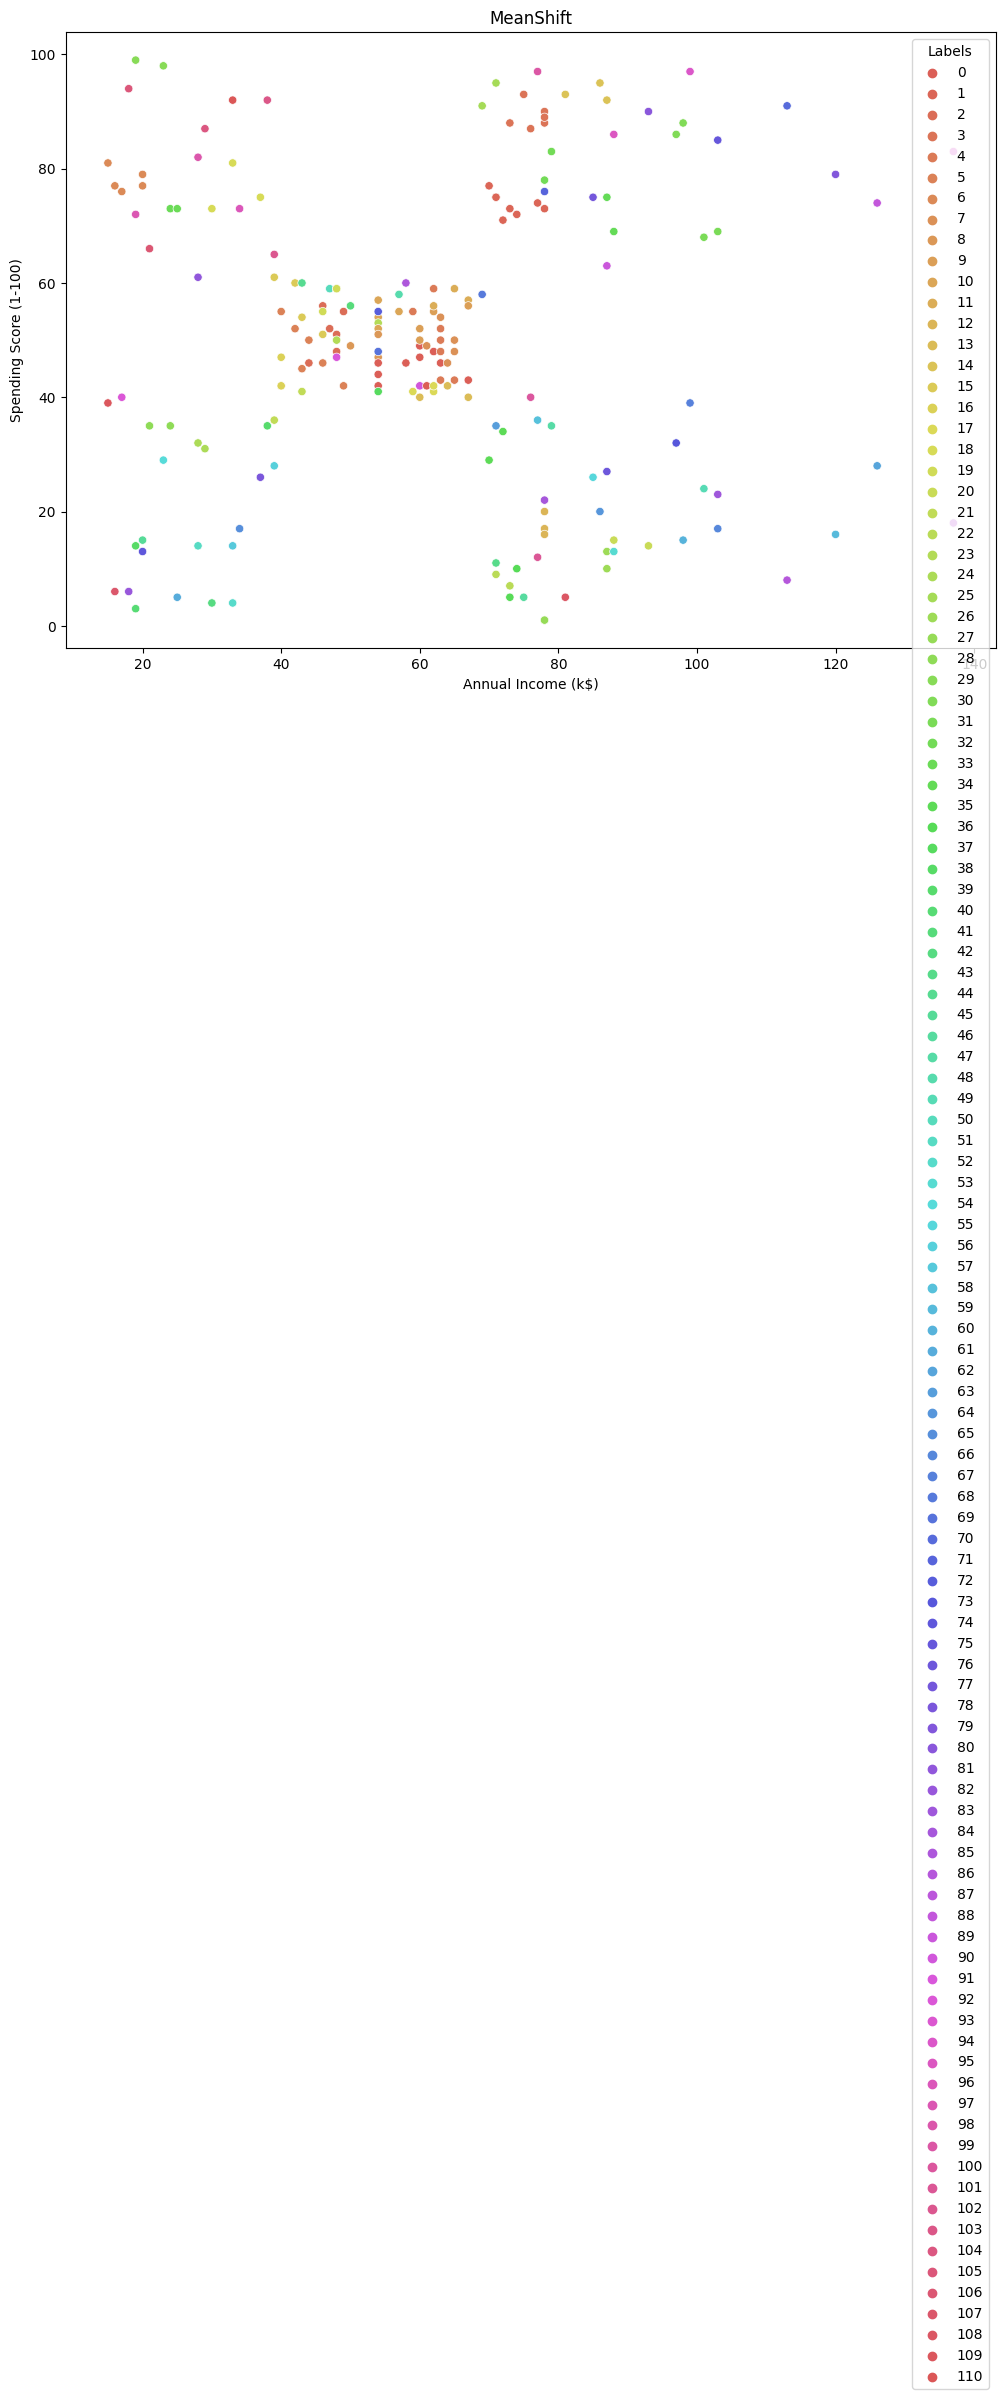

In [ ]:
bandwidth = estimate_bandwidth(X, quantile=0.2)
print(bandwidth)

ms = MeanShift(bandwidth=bandwidth).fit(X)
X['Labels'] = ms.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(data=X, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Labels', palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()


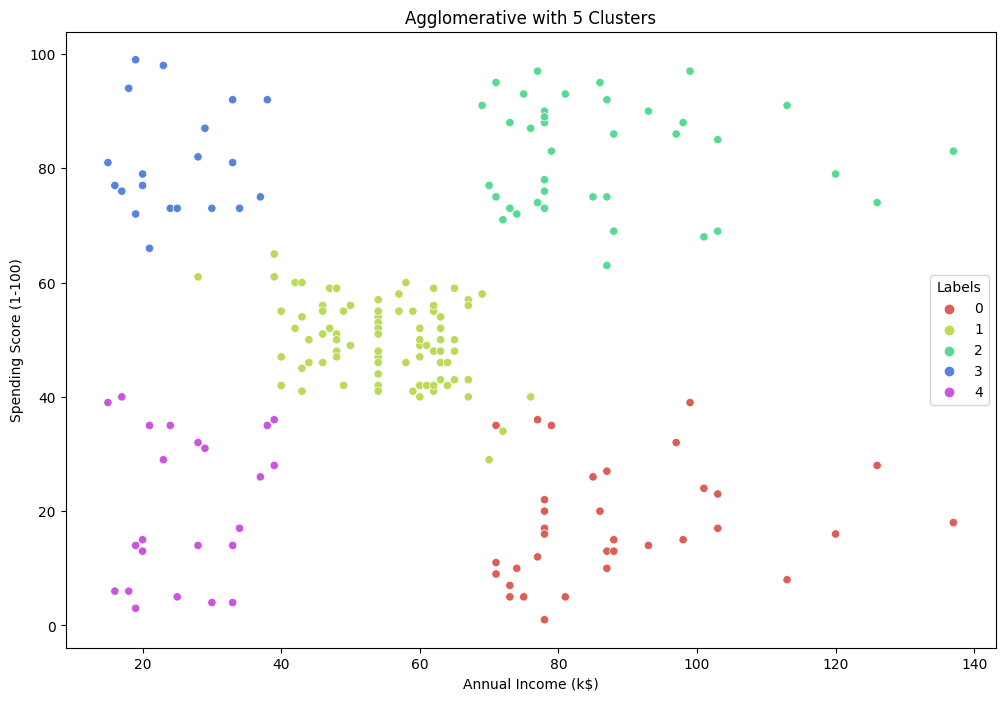

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)
X['Labels'] = agglom.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(data=X, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Labels', palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()
